In [3]:
# Установка пакетов oligo, oligoData, limma, maqcExpression4plex, genefilter
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("oligo")
BiocManager::install("oligoData")
BiocManager::install("limma")
BiocManager::install("maqcExpression4plex")
BiocManager::install("genefilter")
BiocManager::install("ggplot2")

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'oligo'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit', 'bit64', 'data.table', 'dplyr', 'ff', 'GOSemSim', 'httr',
  'sys', 'tidyr'

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'oligoData'

Warning message in install.packages(...):
“installation of package ‘oligoData’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit', 'bit64', 'data.table', 'dplyr', 'ff', 'GOSemSim', 'httr',
  'sys', 'tidyr'

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'limma'

Warning message in install.packages(...):
“installation of package ‘limma’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library("oligo")
library("oligoData")
library("limma")
library("maqcExpression4plex")
library("genefilter")
library('ggplot2')

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: oligoClasses

Welcome to oligoClasses version 1.50.0

Loading required package: Bi

In [2]:
data.dir <- system.file("extdata", package="maqcExpression4plex")
files.path <- list.xysfiles(data.dir, full.names=TRUE)
basename(files.path)

[1] "9868701_532.xys" "9868901_532.xys" "9869001_532.xys" "9870301_532.xys"
[5] "9870401_532.xys" "9870601_532.xys"

In [3]:
files.path

[1] "/home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9868701_532.xys"
[2] "/home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9868901_532.xys"
[3] "/home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9869001_532.xys"
[4] "/home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870301_532.xys"
[5] "/home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870401_532.xys"
[6] "/home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870601_532.xys"

In [4]:
diseases <- c('brain',
              'brain',
              'brain',
             'universal reference',
             'universal reference',
             'universal reference'
             )

data <- data.frame(Key = diseases)
data

Key
<chr>
brain
brain
brain
universal reference
universal reference
universal reference


In [5]:
rownames(data) <- basename(files.path)
data

,Key
,<chr>
9868701_532.xys,brain
9868901_532.xys,brain
9869001_532.xys,brain
9870301_532.xys,universal reference
9870401_532.xys,universal reference
9870601_532.xys,universal reference


In [6]:
levels <- c("exprs", "_ALL_")
MtData <- data.frame(channel=factor('exprs', levels=levels),
                      labelDescription="Sample type")
MtData

channel,labelDescription
<fct>,<chr>
exprs,Sample type


In [7]:
pd <- new("AnnotatedDataFrame", data=data, varMetadata=MtData)
pd

An object of class 'AnnotatedDataFrame'
  rowNames: 9868701_532.xys 9868901_532.xys ... 9870601_532.xys (6
    total)
  varLabels: Key
  varMetadata: channel labelDescription

In [8]:
maqc <- read.xysfiles(files.path, phenoData = pd)
print(rep('-', 10))
maqc

Loading required package: pd.hg18.60mer.expr

Loading required package: RSQLite

Loading required package: DBI

Platform design info loaded.



Checking designs for each XYS file... Done.
Allocating memory... Done.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9868701_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9868901_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9869001_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870301_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870401_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870601_532.xys.
 [1] "-" "-" "-" "-" "-" "-" "-" "-" "-" "-"


ExpressionFeatureSet (storageMode: lockedEnvironment)
assayData: 76774 features, 6 samples 
  element names: exprs 
protocolData
  rowNames: 9868701_532.xys 9868901_532.xys ... 9870601_532.xys (6
    total)
  varLabels: exprs dates
  varMetadata: labelDescription channel
phenoData
  rowNames: 9868701_532.xys 9868901_532.xys ... 9870601_532.xys (6
    total)
  varLabels: Key
  varMetadata: channel labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: pd.hg18.60mer.expr 

In [9]:
# Смотрим на данные
exprs(maqc)[10001:10010, 1:2]

,9868701_532.xys,9868901_532.xys
10001,734.67,742.22
10002,4786.11,4434.67
10003,25600.33,26154.89
10004,1078.56,1092.78
10005,3056.44,3128.33
10006,310.22,385.00
10007,NA,NA
10008,NA,NA
10009,599.44,713.00
10010,28711.67,29794.67


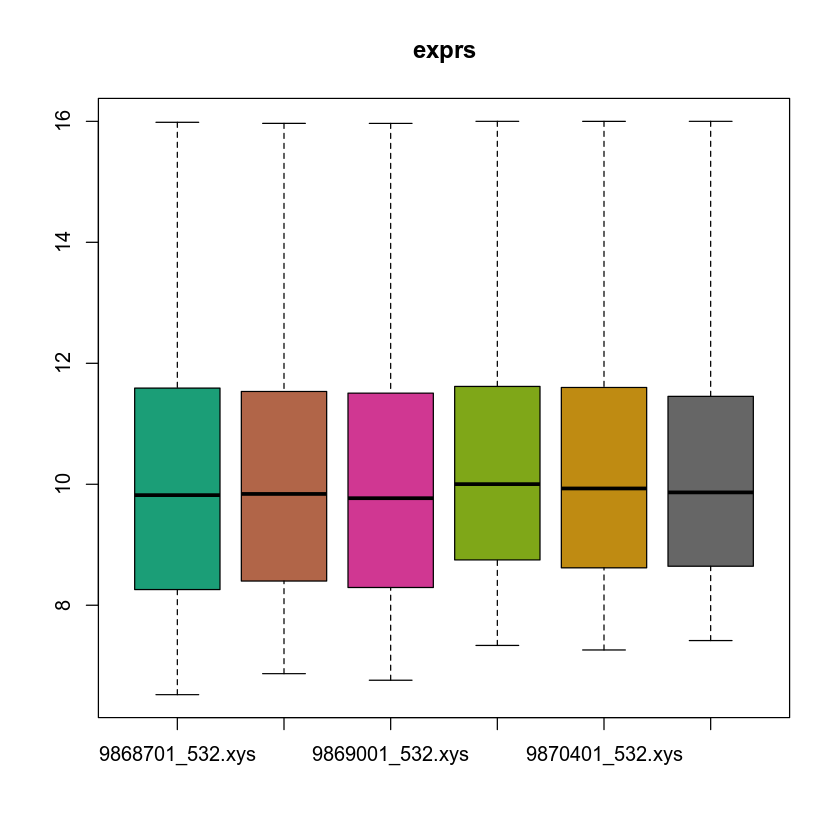

In [10]:
boxplot(maqc)

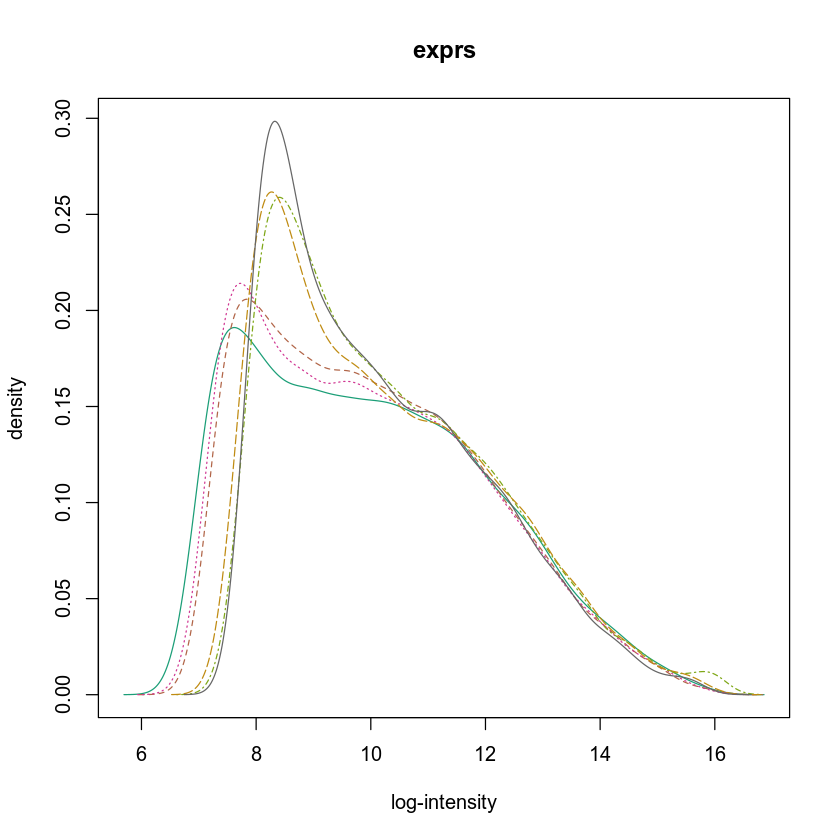

In [11]:
hist(maqc)

In [12]:
# Нормализуем данные
eset <- rma(maqc)

Background correcting
Normalizing
Calculating Expression


In [13]:
exprs(eset)[10001:10010, 1:2]

,9868701_532.xys,9868901_532.xys
NM_014275,10.26541,10.367936
NM_014276,6.35906,6.391927
NM_014278,11.88073,11.862970
NM_014279,14.92681,14.890158
NM_014280,11.73407,11.572199
NM_014281,10.55036,10.488262
NM_014282,14.35916,14.343109
NM_014283,10.30147,10.189285
NM_014285,10.78391,10.731717
NM_014286,14.37042,14.262307


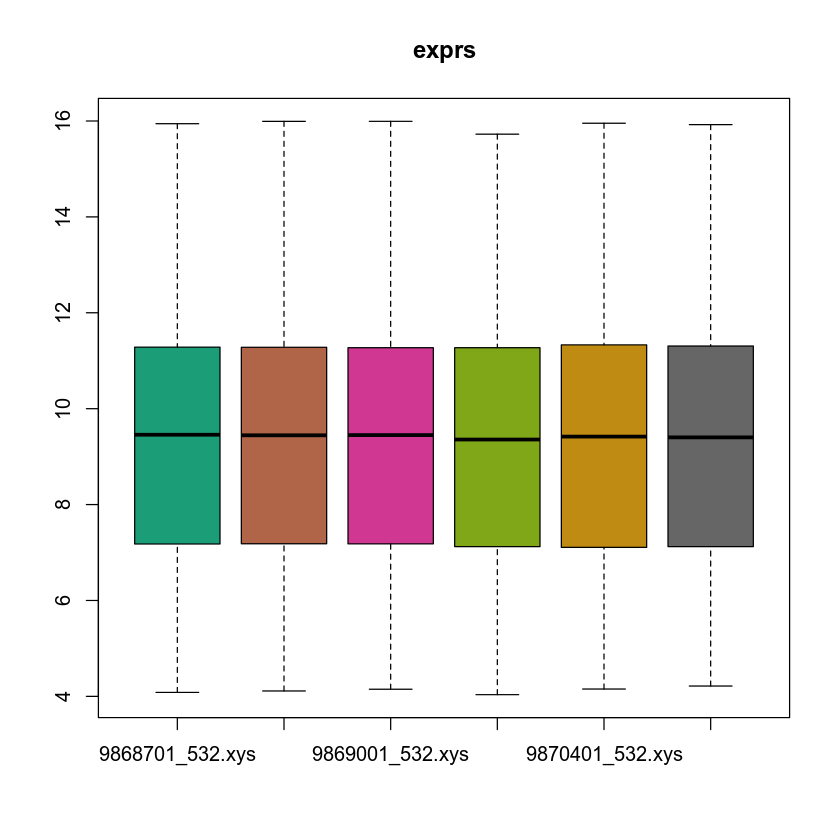

In [14]:
boxplot(eset)

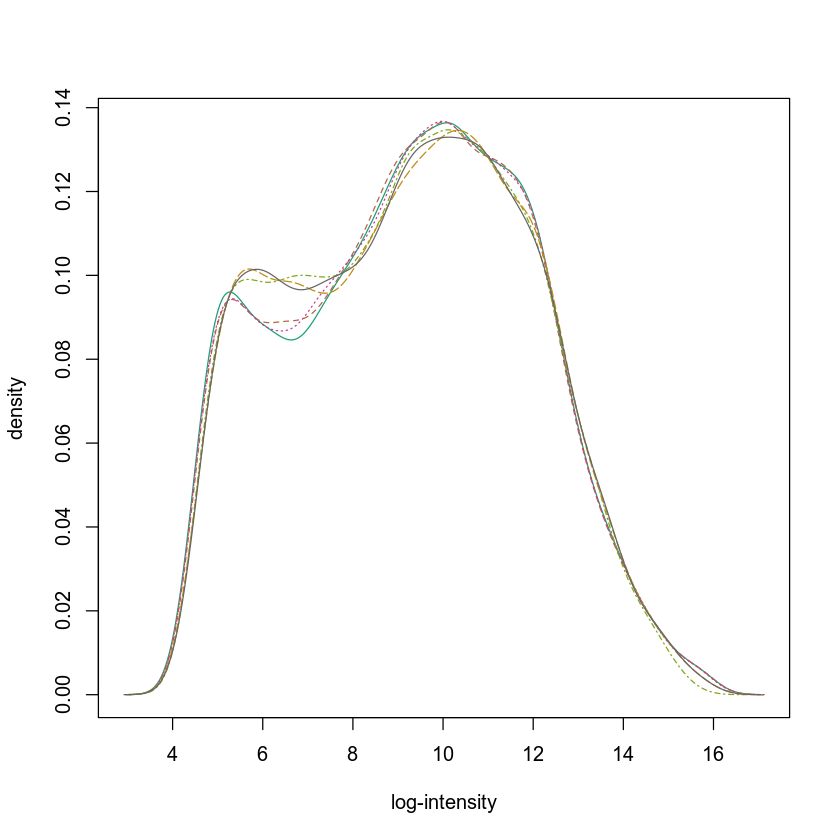

In [15]:
hist(eset)

In [16]:
exprs.data = log2(exprs(eset))

In [70]:
PCA_raw <- prcomp(t(exprs.data), scale. = FALSE)
summary(PCA_raw)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5       PC6
Standard deviation     25.8455 3.24970 2.83913 2.60108 2.38587 2.273e-14
Proportion of Variance  0.9555 0.01511 0.01153 0.00968 0.00814 0.000e+00
Cumulative Proportion   0.9555 0.97065 0.98218 0.99186 1.00000 1.000e+00

In [71]:
se <- PCA_raw$sdev^2
percentVar <- round(100 * se / sum(se), 1)
percentVar

[1] 95.6  1.5  1.2  1.0  0.8  0.0

In [72]:
dataGG <- data.frame(PC1 = PCA_raw$x[,1], PC2 = PCA_raw$x[,2])
dataGG

,PC1,PC2
,<dbl>,<dbl>
9868701_532.xys,-23.75448,0.032443477
9868901_532.xys,-23.47149,-2.150982606
9869001_532.xys,-23.55389,2.133879435
9870301_532.xys,23.41515,-4.682633711
9870401_532.xys,23.75610,0.009557786
9870601_532.xys,23.60860,4.657735619


In [73]:
colnames(eset)

[1] "9868701_532.xys" "9868901_532.xys" "9869001_532.xys" "9870301_532.xys"
[5] "9870401_532.xys" "9870601_532.xys"

In [74]:
data

,Key
,<chr>
9868701_532.xys,brain
9868901_532.xys,brain
9869001_532.xys,brain
9870301_532.xys,universal reference
9870401_532.xys,universal reference
9870601_532.xys,universal reference


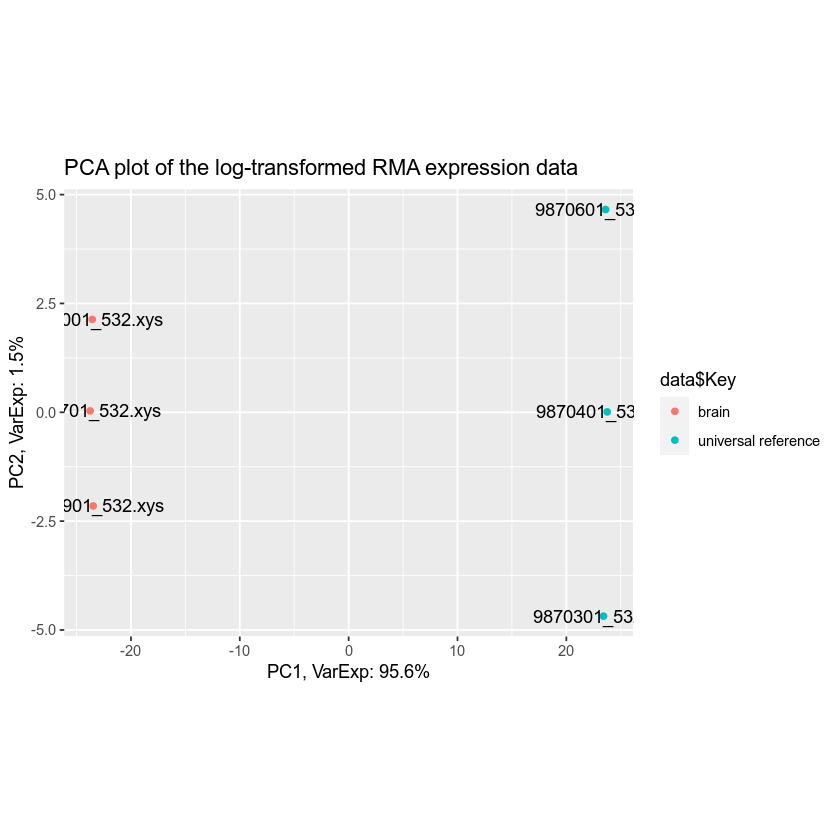

In [75]:
ggplot(dataGG, aes(PC1, PC2)) +
geom_point(aes(colour = data$Key)) +
geom_text(label = colnames(eset)) +
ggtitle("PCA plot of the log-transformed RMA expression data") + 
xlab(paste0("PC1, VarExp: ", percentVar[1], "%")) + 
ylab(paste0("PC2, VarExp: ", percentVar[2], "%")) +
coord_fixed(ratio = 4)

In [61]:
# BiocManager::install('EnhancedVolcano')
# BiocManager::install('airway')
# BiocManager::install('magrittr')
BiocManager::install('DESeq2')

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'DESeq2'

also installing the dependencies ‘locfit’, ‘geneplotter’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit', 'bit64', 'data.table', 'dplyr', 'ff', 'GOSemSim', 'httr',
  'sys', 'tidyr'



In [23]:
library('EnhancedVolcano')
library('airway')
library('magrittr')
library('DESeq2')

Loading required package: ggrepel

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: DelayedArray

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:genefilter’:

    rowSds, rowVars


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians



Attaching package: ‘DelayedArray’


The following objects are masked from ‘package:matrixStats’:

    colMaxs, colMins, colRanges, rowMaxs, rowMins, rowRanges


The following objects are masked from ‘package:base’:

    aperm, apply, rowsum




In [64]:
data('airway')
airway$dex %<>% relevel('untrt')

In [65]:
dds <- DESeqDataSet(airway, design = ~ cell + dex)
dds <- DESeq(dds, betaPrior=FALSE)
res1 <- results(dds, contrast = c('dex','trt','untrt'))

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [67]:
res1

log2 fold change (MLE): dex trt vs untrt 
Wald test p-value: dex trt vs untrt 
DataFrame with 64102 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000000003  708.6022     -0.3812539  0.100654 -3.787751 0.000152017
ENSG00000000005    0.0000             NA        NA        NA          NA
ENSG00000000419  520.2979      0.2068127  0.112219  1.842944 0.065337210
ENSG00000000457  237.1630      0.0379206  0.143445  0.264357 0.791504963
ENSG00000000460   57.9326     -0.0881677  0.287142 -0.307053 0.758803336
...                   ...            ...       ...       ...         ...
LRG_94                  0             NA        NA        NA          NA
LRG_96                  0             NA        NA        NA          NA
LRG_97                  0             NA        NA        NA          NA
LRG_98                  0             NA        NA        NA          NA
LRG_9

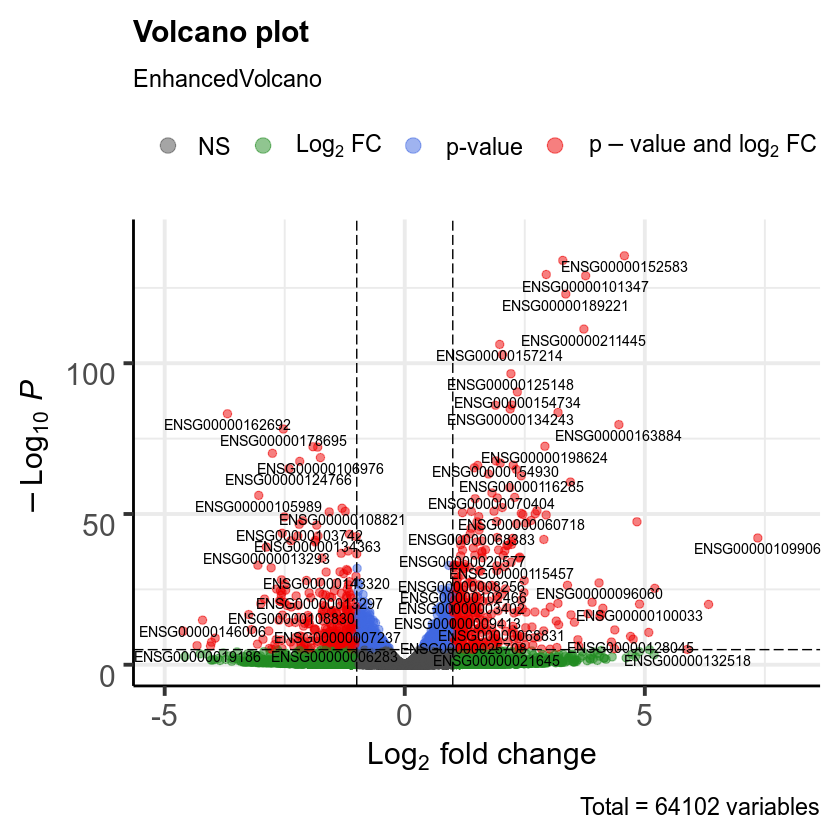

In [83]:
EnhancedVolcano(res1,
    lab = rownames(res1),
    x = 'log2FoldChange',
    y = 'pvalue',
    xlim = c(-5, 8))

In [78]:
EnhancedVolcano(exprs.data,
    lab = rownames(exprs.data),
    x = 'log2FoldChange',
    y = 'pvalue',
    xlim = c(-5, 8))

ERROR: Error in toptable[[x]]: подгруппа выходит за пределы


In [86]:
DESeq(exprs.data)

ERROR: Error in DESeq(exprs.data): is(object, "DESeqDataSet") is not TRUE


In [34]:
exprs.data

,9868701_532.xys,9868901_532.xys,9869001_532.xys,9870301_532.xys,9870401_532.xys,9870601_532.xys
NM_000014,3.618990,3.617383,3.608889,3.732685,3.750969,3.737993
NM_000015,2.155432,2.209621,2.317219,2.315880,2.308311,2.376164
NM_000016,3.630686,3.609210,3.629004,3.671346,3.672139,3.652208
NM_000017,3.090344,3.094538,3.135606,3.213387,3.252277,3.222487
NM_000018,3.652850,3.633904,3.647568,3.723728,3.742054,3.726832
NM_000019,3.548194,3.540645,3.550435,3.644834,3.658211,3.650019
NM_000020,3.155490,3.203138,3.139485,2.783716,2.891998,2.826251
NM_000021,3.556207,3.562031,3.560464,3.504281,3.483898,3.510411
NM_000022,3.156760,3.078142,3.094550,3.605515,3.626645,3.636183
NM_000023,3.159837,3.182027,3.171057,3.083449,2.986943,2.946792


In [35]:
library('gplots')


Attaching package: ‘gplots’


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess




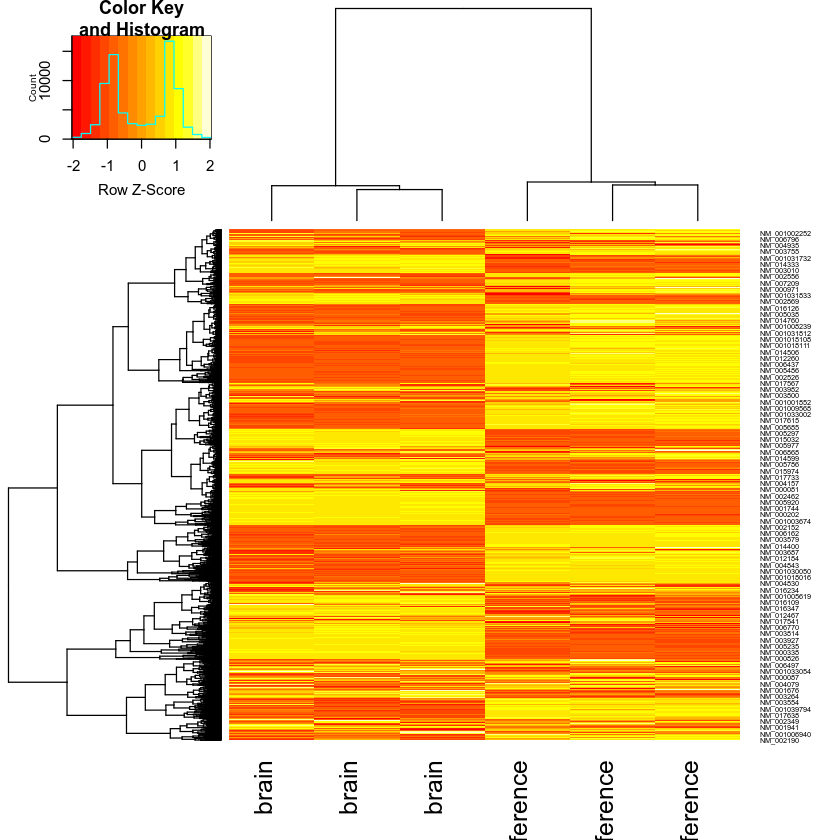

In [49]:
s <- exprs.data[1:12000, 1:6]
colnames(s) <- data$Key
heatmap.2(s, scale='row', trace='none')

In [53]:
topTable(exprs.data, coef="B.PregVsLac", sort.by="p")

ERROR: Error in topTable(exprs.data, coef = "B.PregVsLac", sort.by = "p"): fit must be an MArrayLM object
